Data cleansing

In [2]:
import pandas as pd
import numpy as np
from functions import *

In [3]:
data = pd.read_csv("apartment_house1.csv")

In [4]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,12/4/1999,1,"$729,000.00",apartment
1,1,Ashford,5/8/2017,unknown,"$699,000.00",semi-detached
2,2,Stratford-on-Avon,29/03/2012,3,NaN,detached
3,3,Canterbury,1/7/2009,2,"$529,000.00",teraced
4,4,Camden,16/12/2001,1,"$616,000.00",apartment
5,5,Rugby,1/3/2003,-,"$247,000.00",detached
6,6,Hampstead,5/3/2016,2,$0.00,teraced
7,7,clapham,5/7/2001,363,"$543,000.00",apartment
8,8,Stratford-on-Avon,10/5/2010,3,"$420,000.00",detached
9,9,Camden,16/12/2001,1,"$616,000.00",apartment


Examine our data

In [5]:
data.dtypes

id                      int64
location               object
date_of_sale           object
numbers_of_bedrooms    object
price                  object
type                   object
dtype: object

In [6]:
data.isnull().mean()

id                     0.0
location               0.0
date_of_sale           0.0
numbers_of_bedrooms    0.0
price                  0.1
type                   0.0
dtype: float64

process data_of_sale

In [7]:
data["date_of_sale"] = pd.to_datetime(data["date_of_sale"], dayfirst=True)

In [8]:
data.dtypes

id                              int64
location                       object
date_of_sale           datetime64[ns]
numbers_of_bedrooms            object
price                          object
type                           object
dtype: object

In [9]:

data


,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1,"$729,000.00",apartment
1,1,Ashford,2017-08-05,unknown,"$699,000.00",semi-detached
2,2,Stratford-on-Avon,2012-03-29,3,NaN,detached
3,3,Canterbury,2009-07-01,2,"$529,000.00",teraced
4,4,Camden,2001-12-16,1,"$616,000.00",apartment
5,5,Rugby,2003-03-01,-,"$247,000.00",detached
6,6,Hampstead,2016-03-05,2,$0.00,teraced
7,7,clapham,2001-07-05,363,"$543,000.00",apartment
8,8,Stratford-on-Avon,2010-05-10,3,"$420,000.00",detached
9,9,Camden,2001-12-16,1,"$616,000.00",apartment


In [10]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1,"$729,000.00",apartment
1,1,Ashford,2017-08-05,unknown,"$699,000.00",semi-detached
2,2,Stratford-on-Avon,2012-03-29,3,NaN,detached
3,3,Canterbury,2009-07-01,2,"$529,000.00",teraced
4,4,Camden,2001-12-16,1,"$616,000.00",apartment
5,5,Rugby,2003-03-01,-,"$247,000.00",detached
6,6,Hampstead,2016-03-05,2,$0.00,teraced
7,7,clapham,2001-07-05,363,"$543,000.00",apartment
8,8,Stratford-on-Avon,2010-05-10,3,"$420,000.00",detached
9,9,Camden,2001-12-16,1,"$616,000.00",apartment


In [14]:
non_nums = data[~data["numbers_of_bedrooms"].str.isnumeric()]["numbers_of_bedrooms"].unique()

In [16]:
data["numbers_of_bedrooms"] = data["numbers_of_bedrooms"].replace(non_nums, np.nan)

In [17]:
data["numbers_of_bedrooms"]

0      1
1    NaN
2      3
3      2
4      1
5    NaN
6      2
7    363
8      3
9      1
Name: numbers_of_bedrooms, dtype: object

In [18]:
data["numbers_of_bedrooms"] = pd.to_numeric(data["numbers_of_bedrooms"])

In [19]:
data.dtypes

id                              int64
location                       object
date_of_sale           datetime64[ns]
numbers_of_bedrooms           float64
price                          object
type                           object
dtype: object

In [28]:
data["price"] = data["price"].apply(lambda x: x.replace("$", "")if type(x) is str else x)

In [29]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.0,729000.00,apartment
1,1,Ashford,2017-08-05,NaN,699000.00,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,3,Canterbury,2009-07-01,2.0,529000.00,teraced
4,4,Camden,2001-12-16,1.0,616000.00,apartment
5,5,Rugby,2003-03-01,NaN,247000.00,detached
6,6,Hampstead,2016-03-05,2.0,0.00,teraced
7,7,clapham,2001-07-05,363.0,543000.00,apartment
8,8,Stratford-on-Avon,2010-05-10,3.0,420000.00,detached
9,9,Camden,2001-12-16,1.0,616000.00,apartment


In [30]:
data["price"] = data["price"].apply(lambda x: x.replace(",", "") if type(x) is str else x)

In [31]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.0,729000.00,apartment
1,1,Ashford,2017-08-05,NaN,699000.00,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,3,Canterbury,2009-07-01,2.0,529000.00,teraced
4,4,Camden,2001-12-16,1.0,616000.00,apartment
5,5,Rugby,2003-03-01,NaN,247000.00,detached
6,6,Hampstead,2016-03-05,2.0,0.00,teraced
7,7,clapham,2001-07-05,363.0,543000.00,apartment
8,8,Stratford-on-Avon,2010-05-10,3.0,420000.00,detached
9,9,Camden,2001-12-16,1.0,616000.00,apartment


In [32]:
data["price"] = pd.to_numeric(data["price"])

In [33]:
data.dtypes

id                              int64
location                       object
date_of_sale           datetime64[ns]
numbers_of_bedrooms           float64
price                         float64
type                           object
dtype: object

In [34]:
data["price"] = data["price"].replace([0], np.nan)

In [36]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.0,729000.0,apartment
1,1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,3,Canterbury,2009-07-01,2.0,529000.0,teraced
4,4,Camden,2001-12-16,1.0,616000.0,apartment
5,5,Rugby,2003-03-01,NaN,247000.0,detached
6,6,Hampstead,2016-03-05,2.0,NaN,teraced
7,7,clapham,2001-07-05,363.0,543000.0,apartment
8,8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,9,Camden,2001-12-16,1.0,616000.0,apartment


In [37]:
data["type"].unique()

array(['apartment', 'semi-detached', 'detached', 'teraced'], dtype=object)

In [38]:
data["type"] = data["type"].replace(["teraced"], "terraced")

In [39]:
data["type"].unique()

array(['apartment', 'semi-detached', 'detached', 'terraced'], dtype=object)

outliers

In [40]:
find_outliers(data.numbers_of_bedrooms)

(array([7], dtype=int64),)

In [41]:
find_outliers(data.price)

(array([5], dtype=int64),)

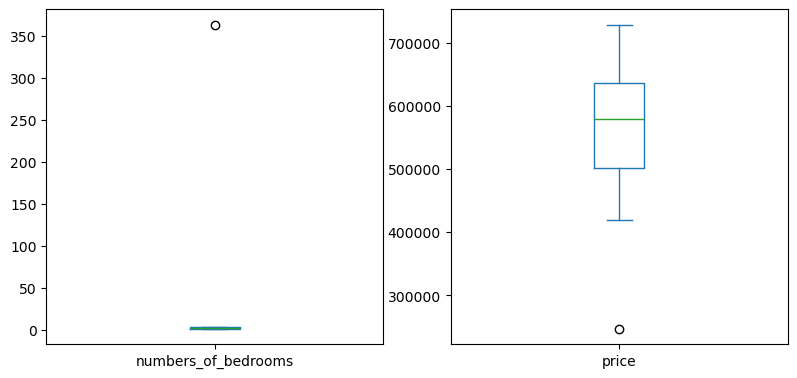

In [42]:
boxPlotAll(data[["numbers_of_bedrooms", "price"]])

In [43]:
data = data.drop(7)

In [44]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.0,729000.0,apartment
1,1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,4,Camden,2001-12-16,1.0,616000.0,apartment
5,5,Rugby,2003-03-01,NaN,247000.0,detached
6,6,Hampstead,2016-03-05,2.0,NaN,terraced
8,8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,9,Camden,2001-12-16,1.0,616000.0,apartment


In [49]:
data[data.duplicated()]


,id,location,date_of_sale,numbers_of_bedrooms,price,type


In [50]:
data = data.drop_duplicates()

In [55]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.0,729000.0,apartment
1,1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,4,Camden,2001-12-16,1.0,616000.0,apartment
5,5,Rugby,2003-03-01,NaN,247000.0,detached
6,6,Hampstead,2016-03-05,2.0,NaN,terraced
8,8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,9,Camden,2001-12-16,1.0,616000.0,apartment


Dealing with nulls

In [56]:
mean = data["numbers_of_bedrooms"].mean()
data["numbers_of_bedrooms"] = data["numbers_of_bedrooms"].fillna(value=mean)

In [57]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.000000,729000.0,apartment
1,1,Ashford,2017-08-05,1.857143,699000.0,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.000000,NaN,detached
3,3,Canterbury,2009-07-01,2.000000,529000.0,terraced
4,4,Camden,2001-12-16,1.000000,616000.0,apartment
5,5,Rugby,2003-03-01,1.857143,247000.0,detached
6,6,Hampstead,2016-03-05,2.000000,NaN,terraced
8,8,Stratford-on-Avon,2010-05-10,3.000000,420000.0,detached
9,9,Camden,2001-12-16,1.000000,616000.0,apartment


In [58]:
data.groupby(["numbers_of_bedrooms"])["price"].mean()

numbers_of_bedrooms
1.000000    653666.666667
1.857143    473000.000000
2.000000    529000.000000
3.000000    420000.000000
Name: price, dtype: float64

In [59]:
data["price"] = data.groupby(["numbers_of_bedrooms"])["price"].transform(lambda x: x.fillna(x.mean()))

In [60]:
data

,id,location,date_of_sale,numbers_of_bedrooms,price,type
0,0,clapham,1999-04-12,1.000000,729000.0,apartment
1,1,Ashford,2017-08-05,1.857143,699000.0,semi-detached
2,2,Stratford-on-Avon,2012-03-29,3.000000,420000.0,detached
3,3,Canterbury,2009-07-01,2.000000,529000.0,terraced
4,4,Camden,2001-12-16,1.000000,616000.0,apartment
5,5,Rugby,2003-03-01,1.857143,247000.0,detached
6,6,Hampstead,2016-03-05,2.000000,529000.0,terraced
8,8,Stratford-on-Avon,2010-05-10,3.000000,420000.0,detached
9,9,Camden,2001-12-16,1.000000,616000.0,apartment
